In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

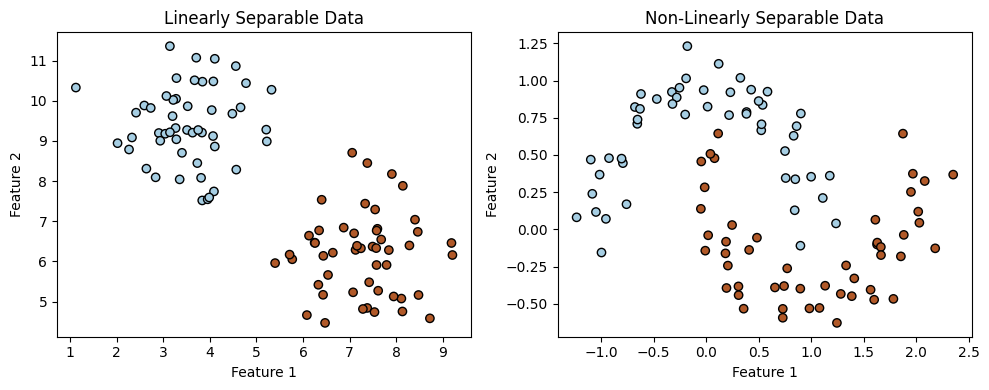

In [31]:
# Part e) 
# Create the data
from sklearn.datasets import make_blobs, make_moons

# Creating a linearly separable dataset
X1, y1 = make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=42)
# Creating a non-linearly separable dataset
X2, y2 = make_moons(n_samples=100, noise=0.13, random_state=42)

# Plotting the datasets
plt.figure(figsize=(10, 4))

# Linearly separable dataset
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='Paired', edgecolor='k')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Non-linearly separable dataset
plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='Paired', edgecolor='k')
plt.title('Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [19]:
# Part f) 
# Train two LogisticRegression models. One on X1, y1 and another on X2, y2. 
# Report number of misclassifications.

model1 = ...
print('Model for linear data: intercept =', model1.intercept_, 'coefficients =', model1.coef_)

model2 = ...
print('Model for linear data: intercept =', model2.intercept_, 'coefficients =', model2.coef_)

Model for linear data: intercept = [-0.01865054] coefficients = [[ 1.8653136  -1.29676196]]
Model for linear data: intercept = [0.13978844] coefficients = [[ 1.12278199 -2.85842498]]


In [33]:
n_errors1 = ...
print(f'Num errors in linear data:', n_errors1)

n_errors2 = ...
print(f'Num errors in non-linear data:', n_errors2)

Num errors in linear data: 0
Num errors in non-linear data: 14


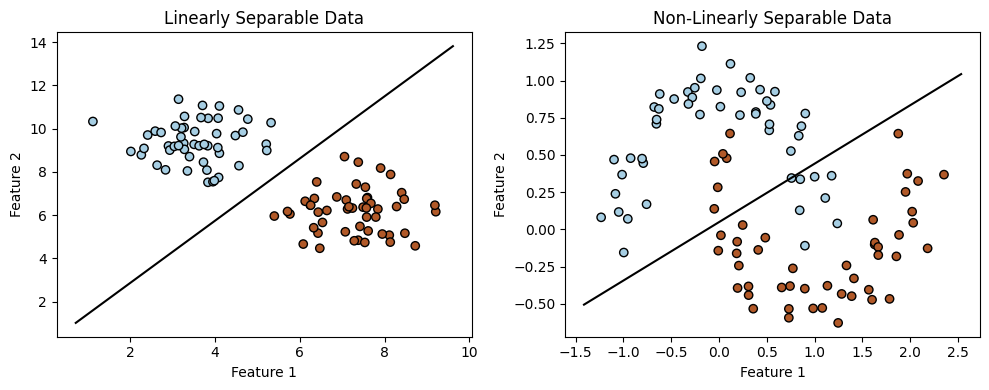

In [34]:
# Part g) Plotting decision boundaries
def decision_boundary(w, b, xlim):
    # This assumes 2d feature vectors. w must be a 1x2 matrix.
    assert w.shape == (1, 2)
    
    # When w_2 is 0, the decision boundary is a vertical line. Ignore this case for simplicity.
    assert w[0, 1] != 0
    
    x1_boundary = np.linspace(xlim[0], xlim[1], 100)   # Define sequence of x1 values between xlim[0], xlim[1]
    x2_boundary = ...                                  # Decision boundary equation
    return x1_boundary, x2_boundary

plt.figure(figsize=(10, 4))

# Linearly separable dataset
plt.subplot(1, 2, 1)
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='Paired', edgecolor='k')

x1_boundary, x2_boundary = decision_boundary(model1.coef_, model1.intercept_, xlim=plt.gca().get_xlim())
plt.plot(x1_boundary, x2_boundary, '-k')

# Non-linearly separable dataset
plt.subplot(1, 2, 2)
plt.title('Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='Paired', edgecolor='k')

x_boundary, y_boundary = decision_boundary(model2.coef_, model2.intercept_, xlim=plt.gca().get_xlim())
plt.plot(x_boundary, y_boundary, '-k')

plt.tight_layout()
plt.show()

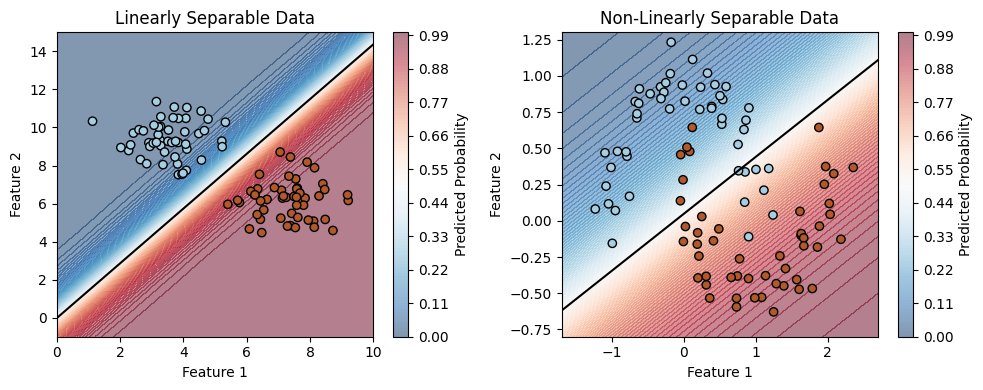

In [38]:
# Part h) How would you expect the predicted probabilities to change on the first dataset, 
#         if the positive and negative clusters of samples overlapped with each other? 
#        [Nothing to code.]
def overlay_probabilities(model, xlim, ylim):
    # Create a grid to evaluate the model at every point in the 2D space
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy_grid = np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1)

    probs = model.predict_proba(xy_grid)[:, 1].reshape(YY.shape)
    plt.contourf(XX, YY, probs, levels=100, cmap='RdBu_r', alpha=0.5)
    plt.colorbar(label='Predicted Probability')


plt.figure(figsize=(10, 4))

# Linearly separable dataset
plt.subplot(1, 2, 1)
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
overlay_probabilities(model1, xlim=(0, 10), ylim=(-1, 15))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='Paired', edgecolor='k')
x_boundary, y_boundary = decision_boundary(model1.coef_, model1.intercept_, xlim=plt.gca().get_xlim())
plt.plot(x_boundary, y_boundary, '-k')

# Non-linearly separable dataset
plt.subplot(1, 2, 2)
plt.title('Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
overlay_probabilities(model2, xlim=(-1.7, 2.7), ylim=(-0.8, 1.3))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='Paired', edgecolor='k')
x_boundary, y_boundary = decision_boundary(model2.coef_, model2.intercept_, xlim=plt.gca().get_xlim())
plt.plot(x_boundary, y_boundary, '-k')

plt.tight_layout()
plt.show()